<a href="https://colab.research.google.com/github/SachkovaGalinaG/exam_04_2025/blob/main/10/another_variant/python-flask-app/product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving product.csv to product.csv


In [2]:
import pandas as pd
df = pd.read_csv('product.csv')
df.head()

,id,name,quantity_sold,total_revenue,category
0,1,Gun box,62,590.48,Books
1,2,Act entire,71,697.15,Books
2,3,There test,38,991.17,Electronics
3,4,School ball,73,725.76,Food
4,5,Whose ok,73,861.38,Clothing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             101 non-null    int64  
 1   name           101 non-null    object 
 2   quantity_sold  101 non-null    int64  
 3   total_revenue  101 non-null    float64
 4   category       101 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.1+ KB


In [3]:
df.describe()

,id,quantity_sold,total_revenue
count,101.000000,101.000000,101.000000
mean,51.000000,49.742574,555.599802
std,29.300171,27.002464,269.637873
min,1.000000,1.000000,19.810000
25%,26.000000,28.000000,382.500000
50%,51.000000,46.000000,580.500000
75%,76.000000,71.000000,755.620000
max,101.000000,99.000000,991.170000


<ipython-input-11-1f82cce2def5>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1 = sns.lineplot(x='category', y='avg_demand', data=category_stats,
<ipython-input-11-1f82cce2def5>:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.lineplot(x='category', y='total_revenue', data=category_stats,
<ipython-input-11-1f82cce2def5>:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax3 = sns.lineplot(x='category', y='product_count', data=category_stats,
<ipython-input-11-1f82cce2def5>:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax4 = sns.lineplot(x='category', y='avg_price', data=price_stats,


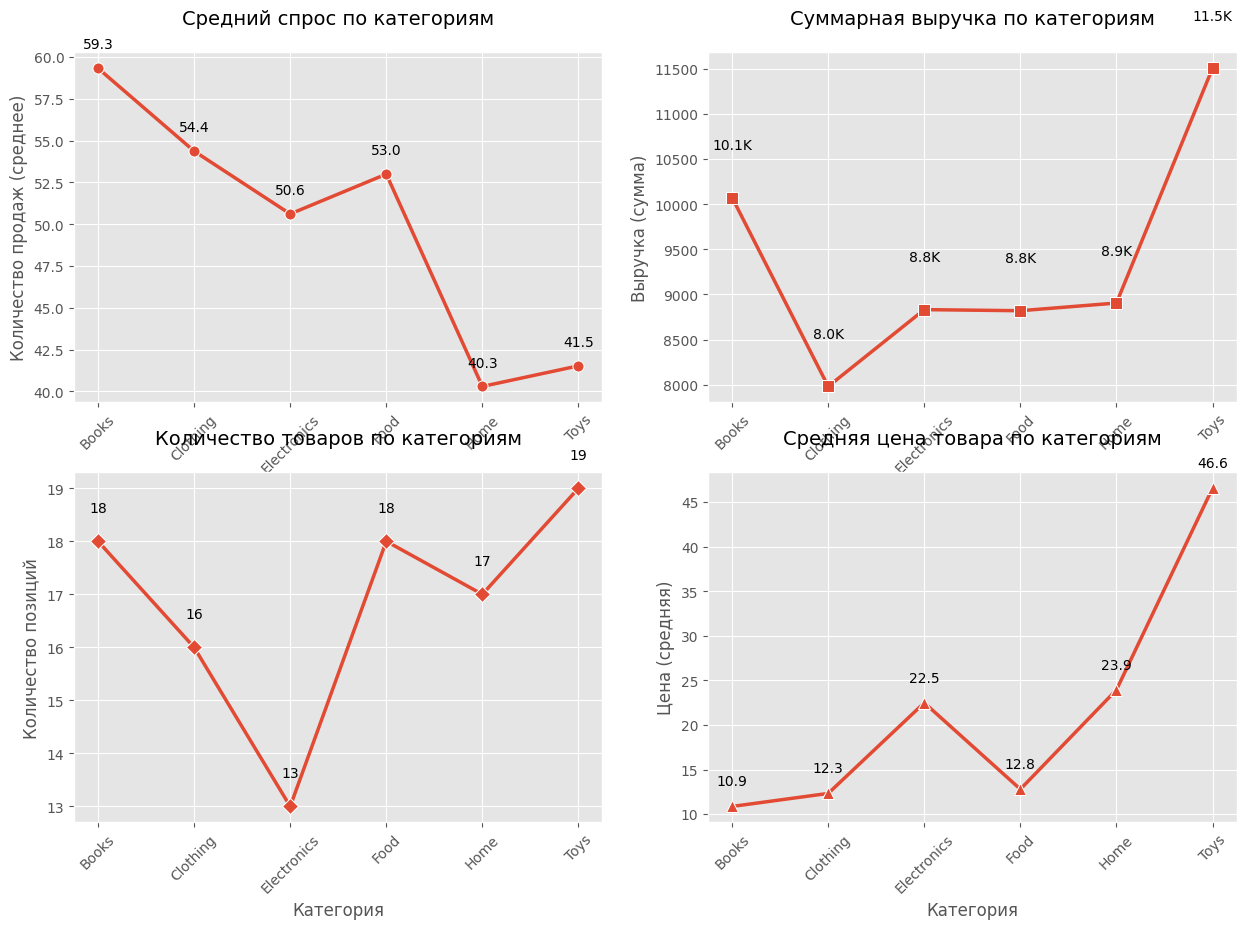

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка и подготовка данных
df = pd.read_csv('product.csv')
category_stats = df.groupby('category').agg(
    avg_demand=('quantity_sold', 'mean'),
    total_revenue=('total_revenue', 'sum'),
    product_count=('id', 'count')
).reset_index()

# Настройка стиля графиков
# plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
colors = sns.color_palette("husl", len(category_stats))

#График среднего спроса
plt.subplot(2, 2, 1)
ax1 = sns.lineplot(x='category', y='avg_demand', data=category_stats,
                  marker='o', markersize=8, linewidth=2.5, palette=colors)
plt.title('Средний спрос по категориям', pad=20, fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество продаж (среднее)', fontsize=12)
plt.xticks(rotation=45)

# Добавление меток значений
for x, y in zip(category_stats['category'], category_stats['avg_demand']):
    ax1.text(x, y+1, f'{y:.1f}', ha='center', va='bottom', fontsize=10)

#График суммарной выручки
plt.subplot(2, 2, 2)
ax2 = sns.lineplot(x='category', y='total_revenue', data=category_stats,
                  marker='s', markersize=8, linewidth=2.5, palette=colors)
plt.title('Суммарная выручка по категориям', pad=20, fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Выручка (сумма)', fontsize=12)
plt.xticks(rotation=45)

# Метки в тысячах с округлением
for x, y in zip(category_stats['category'], category_stats['total_revenue']):
    ax2.text(x, y+500, f'{y/1000:.1f}K', ha='center', va='bottom', fontsize=10)

# График количества товаров
plt.subplot(2, 2, 3)
ax3 = sns.lineplot(x='category', y='product_count', data=category_stats,
                  marker='D', markersize=8, linewidth=2.5, palette=colors)
plt.title('Количество товаров по категориям', pad=20, fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество позиций', fontsize=12)
plt.xticks(rotation=45)

for x, y in zip(category_stats['category'], category_stats['product_count']):
    ax3.text(x, y+0.5, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

#График средней цены
plt.subplot(2, 2, 4)
df['avg_price'] = df['total_revenue'] / df['quantity_sold']
price_stats = df.groupby('category')['avg_price'].mean().reset_index()
ax4 = sns.lineplot(x='category', y='avg_price', data=price_stats,
                  marker='^', markersize=8, linewidth=2.5, palette=colors)
plt.title('Средняя цена товара по категориям', pad=20, fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Цена (средняя)', fontsize=12)
plt.xticks(rotation=45)

for x, y in zip(price_stats['category'], price_stats['avg_price']):
    ax4.text(x, y+2, f'{y:.1f}', ha='center', va='bottom', fontsize=10)



In [14]:
import pandas as pd
import altair as alt

# Загрузка данных
df = pd.read_csv('product.csv')
df['avg_price'] = df['total_revenue'] / df['quantity_sold']
category_stats = df.groupby('category').agg(
    avg_demand=('quantity_sold', 'mean'),
    total_revenue=('total_revenue', 'sum'),
    product_count=('id', 'count'),
    avg_price=('avg_price', 'mean')
).reset_index()

# 1. График среднего спроса (линейный)
chart1 = alt.Chart(category_stats).mark_line(
    point={'size': 80},
    strokeWidth=3
).encode(
    x=alt.X('category:N', title='Категория', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('avg_demand:Q', title='Средний спрос'),
    color=alt.value('#4E79A7'),
    tooltip=['category', alt.Tooltip('avg_demand:Q', title='Средний спрос', format='.1f')]
).properties(
    title='Средний спрос по категориям',
    width=400,
    height=350
)

# 2. График суммарной выручки (столбчатый)
chart2 = alt.Chart(category_stats).mark_bar(
    size=40,
    cornerRadius=5  # Исправленный параметр для скругления всех углов
).encode(
    x=alt.X('category:N', title='Категория', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('total_revenue:Q', title='Суммарная выручка'),
    color=alt.Color('category:N', legend=None, scale=alt.Scale(scheme='tableau20')),
    tooltip=['category', alt.Tooltip('total_revenue:Q', title='Выручка', format='$.2f')]
).properties(
    title='Суммарная выручка по категориям',
    width=400,
    height=350
)

# 3. График количества товаров (точечный с ромбами)
chart3 = alt.Chart(category_stats).mark_point(
    size=200,
    shape='diamond'
).encode(
    x=alt.X('category:N', title='Категория', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('product_count:Q', title='Количество товаров'),
    color=alt.value('#F28E2B'),
    tooltip=['category', 'product_count']
).properties(
    title='Количество товаров по категориям',
    width=400,
    height=350
)

# 4. График средней цены (линейный с треугольниками)
chart4 = alt.Chart(category_stats).mark_line(
    point={'size': 80, 'shape': 'triangle-up'},
    strokeWidth=3
).encode(
    x=alt.X('category:N', title='Категория', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('avg_price:Q', title='Средняя цена'),
    color=alt.value('#E15759'),
    tooltip=['category', alt.Tooltip('avg_price:Q', title='Средняя цена', format='$.2f')]
).properties(
    title='Средняя цена товара по категориям',
    width=400,
    height=350
)

# Компоновка графиков
final_chart = alt.vconcat(
    alt.hconcat(chart1, chart2),
    alt.hconcat(chart3, chart4)
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=18,
    anchor='middle'
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
)

final_chart

alt.VConcatChart(...)